In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig

In [3]:
# Load model & original tokenizer
w2v = Word2Vec.load("w2v.model")
pretrained = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(pretrained)
tokenizer.do_basic_tokenize = False

In [4]:
# Extract embedding vectors
wv = w2v.wv

In [5]:
# Test English embeddings
wv.most_similar("President")

[('president', 0.6135875582695007),
 ('Vice', 0.5695892572402954),
 ('Cabinet', 0.4816548228263855),
 ('Barack', 0.47783035039901733),
 ('Haley', 0.4639204442501068),
 ('Ambassador', 0.46247848868370056),
 ('Trump', 0.45380082726478577),
 ('Secretary', 0.44896385073661804),
 ('elected', 0.4485657811164856),
 ('Veterans', 0.4444684684276581)]

In [5]:
wv.most_similar("Democrats")

[('Republicans', 0.8247424364089966),
 ('Democrat', 0.7306014895439148),
 ('Senators', 0.7109954357147217),
 ('voters', 0.6727645397186279),
 ('Republican', 0.6566659212112427),
 ('Democratic', 0.6404553055763245),
 ('candidates', 0.6402655839920044),
 ('conservative', 0.624053418636322),
 ('GO', 0.6172469854354858),
 ('politicians', 0.617133617401123)]

In [6]:
wv.most_similar("Republicans")

[('Democrats', 0.824742317199707),
 ('candidates', 0.7672741413116455),
 ('Republican', 0.7513846755027771),
 ('voters', 0.7429679036140442),
 ('Senators', 0.7342748641967773),
 ('Democratic', 0.7134301066398621),
 ('Democrat', 0.6997736096382141),
 ('Senate', 0.6707994937896729),
 ('votes', 0.6696121096611023),
 ('primary', 0.6679738163948059)]

In [4]:
# Test German embeddings
print(tokenizer.tokenize("Kanzlerin"))
wv.most_similar("Kan")


['Kan', '##zler', '##in']


[('##zler', 0.7757713198661804),
 ('##amt', 0.647746205329895),
 ('##kan', 0.5684409141540527),
 ('Präsident', 0.5635465979576111),
 ('##skan', 0.5533694624900818),
 ('Wie', 0.5428311228752136),
 ('##präsident', 0.5383456349372864),
 ('Bundes', 0.5350789427757263),
 ('Regierung', 0.5263512134552002),
 ('offiziell', 0.5239222645759583)]

In [23]:
wv.most_similar("Merkel")

[('Deutschland', 0.5996796488761902),
 ('##erk', 0.5855292677879333),
 ('keiner', 0.5680962800979614),
 ('alles', 0.5509839057922363),
 ('Unabhängigkeit', 0.5424882173538208),
 ('##zler', 0.5304389595985413),
 ('dass', 0.5203633308410645),
 ('bedeutet', 0.5101034045219421),
 ('Großbritannien', 0.5090433955192566),
 ('stark', 0.5016160607337952)]

In [24]:
wv.most_similar("Berlin")

[('fahren', 0.63523268699646),
 ('Berliner', 0.6291613578796387),
 ('Thüringer', 0.6208083033561707),
 ('Hier', 0.620007336139679),
 ('Frankfurter', 0.6046846508979797),
 ('Hamburg', 0.6005253195762634),
 ('Brandenburg', 0.5849898457527161),
 ('seinen', 0.5807703137397766),
 ('ziehen', 0.580216109752655),
 ('Frankfurt', 0.5757379531860352)]

In [27]:
wv.most_similar("Ich")

[('ich', 0.8926253318786621),
 ('mir', 0.8088604211807251),
 ('meine', 0.7526894807815552),
 ('sehr', 0.7479269504547119),
 ('werde', 0.7369027733802795),
 ('Ihr', 0.7305464744567871),
 ('habe', 0.7287513017654419),
 ('ihr', 0.727696418762207),
 ('nichts', 0.7243220210075378),
 ('dich', 0.7204768061637878)]

In [28]:
wv.most_similar("Putin")

[('Russia', 0.6803515553474426),
 ('Vladimir', 0.6780312657356262),
 ('Kerry', 0.6663135290145874),
 ('Russian', 0.6467695832252502),
 ('Assad', 0.6162712574005127),
 ('Iran', 0.6041693091392517),
 ('Syria', 0.5745494365692139),
 ('ambassador', 0.5717394948005676),
 ('Flynn', 0.5625778436660767),
 ('Ukraine', 0.5494745373725891)]

In [29]:
tokenizer.tokenize("Благодарность") # Thank you

['Б', '##лаг', '##ода', '##рность']

In [31]:
tokenizer.tokenize("президент") # president
wv.most_similar("президент") # from top to bottom: parliament, gouvenour, another word for president, politician, citizen, member, great, elected

[('парламент', 0.6977012753486633),
 ('губернатор', 0.6335374712944031),
 ('президента', 0.6321172118186951),
 ('Президент', 0.6167054176330566),
 ('политик', 0.6045437455177307),
 ('граждан', 0.592194139957428),
 ('член', 0.5789040327072144),
 ('премьер', 0.5773629546165466),
 ('избран', 0.5730186104774475),
 ('лидер', 0.5724366903305054)]

In [40]:
# Analysis of embeddings for political concepts
# Starting from the word president in all three languages
# and continuing with similar neighbors.
x = []
labels = []
for w in ["Präsident","president","президент"]:
    w_vec = wv[w]
    x.append(w_vec)
    labels.append(w)
    ms = wv.most_similar(w)
    for nw,sim in ms: # 1 level deep
        if not nw in labels:
            nw_vec = wv[nw]
            x.append(nw_vec)
            labels.append(nw)
        mss = wv.most_similar(nw)
        for nnw,simm in mss: # 2 level deep
            if not nnw in labels:
                nnw_vec = wv[nnw]
                x.append(nnw_vec)
                labels.append(nnw)

In [48]:
x = np.array(x)
print(x.shape)

(212, 768)


In [56]:
# TSNE reduction
reduced_embed = TSNE(n_components= 2).fit_transform(x)

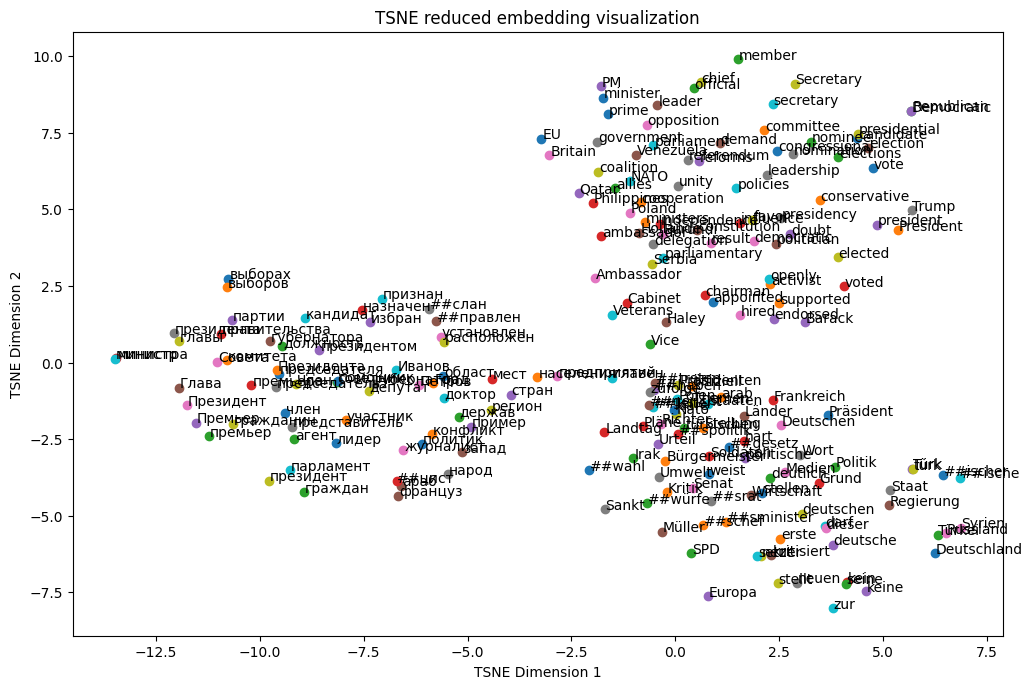

In [58]:
# Based on JK's submission for lab 3
# Sources:

# For TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# For plot: https://github.com/antot/ltp-notebooks-201920/blob/master/05_Representations.ipynb
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
for i,pair in enumerate(reduced_embed):
    plt.scatter(pair[0],pair[1])
    plt.text(pair[0] + 0.02,pair[1],labels[i])
plt.title("TSNE reduced embedding visualization")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()